In [1]:
%pip install llama-index-llms-openai
%pip install llama-index-readers-file
%pip install python-dotenv
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load environment variables from .env file
import pandas as pd
from llama_index.core.evaluation import (
    RetrieverEvaluator,
    get_retrieval_results_df,
)
import os
import logging
import pandas as pd
from dotenv import load_dotenv
from llama_index.llms.azure_openai import AzureOpenAI
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.readers.file import PyMuPDFReader
from llama_index.core.node_parser import SentenceSplitter
from datetime import datetime
from llama_index.core import (
    StorageContext, VectorStoreIndex, SimpleDirectoryReader, 
    get_response_synthesizer, Settings
)
import traceback
from llama_index.core.evaluation import (
    generate_question_context_pairs,
    EmbeddingQAFinetuneDataset,
)
from llama_index.core.evaluation import generate_question_context_pairs, QueryResponseDataset
from llama_index.llms.openai import OpenAI

import nest_asyncio

nest_asyncio.apply()

from pathlib import Path
from llama_index.readers.file import PDFReader
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.retrievers import RecursiveRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core import VectorStoreIndex
from llama_index.llms.openai import OpenAI
import json
from llama_index.core import Document
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.schema import IndexNode
from llama_index.core.embeddings import resolve_embed_model

######
import nest_asyncio
from llama_index.core import Settings





nest_asyncio.apply()
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.schema import IndexNode
from llama_index.core.extractors import (
    SummaryExtractor,
    QuestionsAnsweredExtractor,
)


load_dotenv()
# Fetch API keys from environment variables
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')
GROQ_API_KEY = os.getenv('GROQ_API_KEY')
AZURE_API_KEY = os.getenv('AZURE_API_KEY')
AZURE_DEPLOYMENT_NAME = os.getenv("AZURE_DEPLOYMENT_NAME")
AZURE_API_VERSION = os.getenv("AZURE_API_VERSION")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")


llm = AzureOpenAI(
    deployment_name=AZURE_DEPLOYMENT_NAME,
    temperature=0, 
    api_key=AZURE_API_KEY,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_version=AZURE_API_VERSION
)
Settings.llm = llm
embed_model = HuggingFaceEmbedding(
    #model_name = "Alibaba-NLP/gte-large-en-v1.5", trust_remote_code=True
    model_name="BAAI/bge-large-en-v1.5"
)
Settings.embed_model = embed_model

In [5]:
# Loading docs
loader = PyMuPDFReader()
docs1 = loader.load(file_path="./LL144.pdf")
docs2 = loader.load(file_path="./LL144_Definitions.pdf")
docs = docs1 + docs2
#docs0 = loader.load_data(file=Path("policy.pdf"))
node_parser = SentenceSplitter(chunk_size=512)
base_nodes = node_parser.get_nodes_from_documents(docs)

In [32]:
loader = PyMuPDFReader()
#docs1 = loader.load(file_path="./LL144.pdf")
#docs2 = loader.load(file_path="./LL144_Definitions.pdf")
#docs = docs1 + docs2

docs = loader.load(file_path="./EUAIACT.pdf")
docs = docs[:20]
node_parser = SentenceSplitter(chunk_size=512)
base_nodes = node_parser.get_nodes_from_documents(docs)

In [6]:
#node_parser = SentenceSplitter(chunk_size=512)
#base_nodes = node_parser.get_nodes_from_documents(docs)

# set node ids to be a constant
for idx, node in enumerate(base_nodes):
    node.id_ = f"node-{idx}"

base_index = VectorStoreIndex(base_nodes, embed_model=embed_model)
base_retriever = base_index.as_retriever(similarity_top_k=5)

retrievals = base_retriever.retrieve(
    "What is the impact ratio?"
)

for n in retrievals:
    display_source_node(n, source_length=1500)

query_engine_base= RetrieverQueryEngine.from_args(base_retriever, llm=llm)

**Node ID:** node-9<br>**Similarity:** 0.7072380178685519<br>**Text:** 4 
 
iii. 
at any point during the bias audit, has a direct financial interest or a material indirect 
financial interest in an employer or employment agency that seeks to use or continue to 
use the  AEDT or in a vendor that developed or distributed the AEDT. 
 
Impact Ratio. “Impact ratio” means either (1) the selection rate for a category divided by the selection 
rate of the most selected category or (2) the scoring rate for a category divided by the scoring rate for the 
highest scoring category.  
 
 
 
    _________selection rate for a category________  
Impact Ratio =        selection rate of the most selected category  
 
OR 
 
  
 
     ______scoring rate for a category__________  
Impact Ratio =        scoring rate of the highest scoring category 
 
 
Machine learning, statistical modeling, data analytics, or artificial intelligence. “Machine learning, 
statistical modeling, data analytics, or artificial intelligence” means a group of mathematical, computer-
based techniques:  
i. 
that generate a prediction, meaning an expected outcome for an observation, such as an 
assessment of a candidate’s fit or likelihood of success, or that generate a classification, 
meaning an assignment of an observation to a group, such as categorizations based on 
skill sets or aptitude; and  
ii. 
for which a computer at least in part identifies the inputs, the relative importance placed 
on those inputs, and, if applicable, other parameters for the models in order to improve 
the...<br>

**Node ID:** node-15<br>**Similarity:** 0.6365741421613906<br>**Text:** 7 
 
(3) Calculate the impact ratio for each category;  
(4) Ensure that the calculations required in paragraphs (1), (2), and (3) of this subdivision 
separately calculate the impact of the AEDT on: 
i. Sex categories (i.e., impact ratio for selection of male candidates vs female candidates),  
ii. Race/Ethnicity categories (e.g., impact ratio for selection of Hispanic or Latino 
candidates vs Black or African American [Not Hispanic or Latino] candidates), and 
iii. intersectional categories of sex, ethnicity, and race (e.g., impact ratio for selection of 
Hispanic or Latino male candidates vs. Not Hispanic or Latino Black or African American 
female candidates); and  
(5) Indicate the number of individuals the AEDT assessed that are not included in the required 
calculations because they fall within an unknown category. 
(d) Notwithstanding the requirements of paragraphs (2) and (3) of subdivision (b) and paragraphs (3) and 
(4) of subdivision (c), an independent auditor may exclude a category that represents less than 2% of 
the data being used for the bias audit from the required calculations for impact ratio. Where such a 
category is excluded, the summary of results must include the independent auditor’s justification for the 
exclusion, as well as the number of applicants and scoring rate or selection rate for the excluded 
category.  
 
Example: An employer uses an AEDT to score applicants for “culture fit.” To do so, the employer must 
ensure that a bias audit of ...<br>

**Node ID:** node-6<br>**Similarity:** 0.6297492278350558<br>**Text:** 2 
 
 
Clarifying that the required “impact ratio” must be calculated separately to compare sex categories, 
race/ethnicity categories, and intersectional categories; 
 
Clarifying the types of data that may be used to conduct a bias audit; 
 
Clarifying that multiple employers using the same AEDT may rely on the same bias audit so long as they 
provide historical data, if available, for the independent auditor to consider in such bias audit; and 
 
Clarifying that an AEDT may not be used if its most recent bias audit is more than a year old; 
 
The Department received comments about the second version of the proposed rule from the public, including 
from employers, employment agencies, law firms, AEDT developers, and advocacy organizations. Various 
issues raised in the comments resulted in changes that are present in these final rules. These changes include: 
 
Modifying the definition of “machine learning, statistical modeling, data analytics, or artificial intelligence” 
to expand its scope; 
 
Adding a requirement that the bias audit indicate the number of individuals the AEDT assessed that are 
not included in the calculations because they fall within an unknown category, and requiring that number 
be included in the summary of results; 
 
Allowing an independent auditor to exclude a category that comprises less than 2% of the data being 
used for the bias audit from the calculations of impact ratio; 
 
Clarifying the examples of a bias audit; 
 
Clarifying ...<br>

**Node ID:** node-16<br>**Similarity:** 0.5784985880598632<br>**Text:** (d) Notwithstanding the requirements of paragraphs (2) and (3) of subdivision (b) and paragraphs (3) and 
(4) of subdivision (c), an independent auditor may exclude a category that represents less than 2% of 
the data being used for the bias audit from the required calculations for impact ratio. Where such a 
category is excluded, the summary of results must include the independent auditor’s justification for the 
exclusion, as well as the number of applicants and scoring rate or selection rate for the excluded 
category.  
 
Example: An employer uses an AEDT to score applicants for “culture fit.” To do so, the employer must 
ensure that a bias audit of the AEDT was conducted no more than a year before the use of the AEDT. 
The employer provides historical data on “culture fit” score of applicants for each category to an 
independent auditor to conduct a bias audit as follows:  
 
Sex Categories 
  
# of 
Applicants 
Scoring 
Rate 
Impact Ratio 
Male 
92 
54.3% 
1.00 
Female 
76 
44.7% 
0.82 
 
 
Race/Ethnicity Categories 
  
# of 
Applicants 
Scoring 
Rate 
Impact 
Ratio 
Hispanic or Latino 
28 
64.2% 
1.00 
White (Not Hispanic or Latino) 
40 
37.5% 
0.58 
Black or African American (Not Hispanic or Latino) 
32 
50.0% 
0.78 
Native Hawaiian or Pacific Islander (Not Hispanic or Latino) 
8 
62.5% 
0.97 
Asian (Not Hispanic or Latino) 
24 
41.7% 
0.65 
Native American or Alaska Native (Not Hispanic or Latino) 
16 
62.5% 
0.97 
Two or More Races (Not Hispanic or Latino) 
20 
5...<br>

**Node ID:** node-10<br>**Similarity:** 0.5400874928715502<br>**Text:** Scoring Rate. “Scoring Rate” means the rate at which individuals in a category receive a score above 
the sample’s median score, where the score has been calculated by an AEDT. 
 
Screen. “Screen” means to make a determination about whether a candidate for employment or 
employee being considered for promotion should be selected or advanced in the hiring or promotion 
process.  
 
Selection Rate. “Selection rate” means the rate at which individuals in a category are either selected to 
move forward in the hiring process or assigned a classification by an AEDT. Such rate may be calculated 
by dividing the number of individuals in the category moving forward or assigned a classification by the 
total number of individuals in the category who applied for a position or were considered for promotion.  
 
Example. If 100 Hispanic women apply for a position and 40 are selected for an interview after use of an 
AEDT, the selection rate for Hispanic women is 40/100 or 40%.  
 
Simplified output. “Simplified output” means a prediction or classification as specified in the definition 
for “machine learning, statistical modelling, data analytics, or artificial intelligence.” A simplified output 
may take the form of a score (e.g., rating a candidate’s estimated technical skills), tag or categorization 
(e.g., categorizing a candidate’s resume based on key words, assigning a skill or trait to a candidate), 
recommendation (e.g., whether a candidate should be given an interview), or ran...<br>

In [7]:
sub_chunk_sizes = [128, 256]
sub_node_parsers = [
    SentenceSplitter(chunk_size=c, chunk_overlap=20) for c in sub_chunk_sizes
]

all_nodes = []
for base_node in base_nodes:
    for n in sub_node_parsers:
        sub_nodes = n.get_nodes_from_documents([base_node])
        sub_inodes = [
            IndexNode.from_text_node(sn, base_node.node_id) for sn in sub_nodes
        ]
        all_nodes.extend(sub_inodes)

    # also add original node to node
    original_node = IndexNode.from_text_node(base_node, base_node.node_id)
    all_nodes.append(original_node)


all_nodes_dict = {n.node_id: n for n in all_nodes}
vector_index_chunk = VectorStoreIndex(all_nodes, embed_model=embed_model)
vector_retriever_chunk = vector_index_chunk.as_retriever(similarity_top_k=5)

retriever_chunk = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_chunk},
    node_dict=all_nodes_dict,
    verbose=True,
)

nodes = retriever_chunk.retrieve(
    "Can you tell me about the key concepts for safety finetuning"
)
for node in nodes:
    display_source_node(node, source_length=2000)

query_engine_chunk = RetrieverQueryEngine.from_args(retriever_chunk, llm=llm)
response = query_engine_chunk.query(
    "Can you tell me about the key concepts for an AEDT?"
)
print(str(response))

Retrieving with query id None: Can you tell me about the key concepts for safety finetuning
Retrieved node with id, entering: node-6
Retrieving with query id node-6: Can you tell me about the key concepts for safety finetuning
Retrieved node with id, entering: node-9
Retrieving with query id node-9: Can you tell me about the key concepts for safety finetuning


**Node ID:** node-6<br>**Similarity:** 0.5921767057535602<br>**Text:** 2 
 
 
Clarifying that the required “impact ratio” must be calculated separately to compare sex categories, 
race/ethnicity categories, and intersectional categories; 
 
Clarifying the types of data that may be used to conduct a bias audit; 
 
Clarifying that multiple employers using the same AEDT may rely on the same bias audit so long as they 
provide historical data, if available, for the independent auditor to consider in such bias audit; and 
 
Clarifying that an AEDT may not be used if its most recent bias audit is more than a year old; 
 
The Department received comments about the second version of the proposed rule from the public, including 
from employers, employment agencies, law firms, AEDT developers, and advocacy organizations. Various 
issues raised in the comments resulted in changes that are present in these final rules. These changes include: 
 
Modifying the definition of “machine learning, statistical modeling, data analytics, or artificial intelligence” 
to expand its scope; 
 
Adding a requirement that the bias audit indicate the number of individuals the AEDT assessed that are 
not included in the calculations because they fall within an unknown category, and requiring that number 
be included in the summary of results; 
 
Allowing an independent auditor to exclude a category that comprises less than 2% of the data being 
used for the bias audit from the calculations of impact ratio; 
 
Clarifying the examples of a bias audit; 
 
Clarifying when an employer or employment agency may rely on a bias audit conducted using the 
historical data of other employers or employment agencies; 
 
Providing examples of when an employer or employment agency may rely on a bias audit conducted with 
historical data, test data, or historical data from other employers and employment agencies; 
 
Clarifying that the number of applicants in a category and scoring rate of a category, if applicable, must 
be included in the summary of results. 
 
New m...<br>

**Node ID:** node-9<br>**Similarity:** 0.508814009741948<br>**Text:** 4 
 
iii. 
at any point during the bias audit, has a direct financial interest or a material indirect 
financial interest in an employer or employment agency that seeks to use or continue to 
use the  AEDT or in a vendor that developed or distributed the AEDT. 
 
Impact Ratio. “Impact ratio” means either (1) the selection rate for a category divided by the selection 
rate of the most selected category or (2) the scoring rate for a category divided by the scoring rate for the 
highest scoring category.  
 
 
 
    _________selection rate for a category________  
Impact Ratio =        selection rate of the most selected category  
 
OR 
 
  
 
     ______scoring rate for a category__________  
Impact Ratio =        scoring rate of the highest scoring category 
 
 
Machine learning, statistical modeling, data analytics, or artificial intelligence. “Machine learning, 
statistical modeling, data analytics, or artificial intelligence” means a group of mathematical, computer-
based techniques:  
i. 
that generate a prediction, meaning an expected outcome for an observation, such as an 
assessment of a candidate’s fit or likelihood of success, or that generate a classification, 
meaning an assignment of an observation to a group, such as categorizations based on 
skill sets or aptitude; and  
ii. 
for which a computer at least in part identifies the inputs, the relative importance placed 
on those inputs, and, if applicable, other parameters for the models in order to improve 
the accuracy of the prediction or classification. 
 
Scoring Rate. “Scoring Rate” means the rate at which individuals in a category receive a score above 
the sample’s median score, where the score has been calculated by an AEDT. 
 
Screen. “Screen” means to make a determination about whether a candidate for employment or 
employee being considered for promotion should be selected or advanced in the hiring or promotion 
process.  
 
Selection Rate. “Selection rate” means the rate at which individua...<br>

Retrieving with query id None: Can you tell me about the key concepts for an AEDT?
Retrieved node with id, entering: node-6
Retrieving with query id node-6: Can you tell me about the key concepts for an AEDT?
Retrieved node with id, entering: node-7
Retrieving with query id node-7: Can you tell me about the key concepts for an AEDT?
Retrieved node with id, entering: node-18
Retrieving with query id node-18: Can you tell me about the key concepts for an AEDT?


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The key concepts for an Automated Employment Decision Tool (AEDT) include the following:

1. Automated Employment Decision Tool: An AEDT is defined as a tool that substantially assists or replaces discretionary decision-making in the employment process. It can rely solely on a simplified output, use a simplified output as one of the criteria with more weight, or use a simplified output to overrule conclusions derived from other factors.

2. Bias Audit: A bias audit is a process conducted to assess and identify any potential bias in the AEDT. It involves analyzing the data used by the tool and evaluating its impact on different categories, such as sex, race/ethnicity, and intersectional categories. The audit should indicate the number of individuals not included in the calculations due to falling within an unknown category.

3. Candidate for Employment: A candidate for employment refers to a person who has applied for a specific employment position by submitting the necessary informatio

In [8]:

extractors = [
    SummaryExtractor(summaries=["self"], show_progress=True),
    QuestionsAnsweredExtractor(questions=5, show_progress=True),
]

# run metadata extractor across base nodes, get back dictionaries
node_to_metadata = {}
for extractor in extractors:
    metadata_dicts = extractor.extract(base_nodes)
    for node, metadata in zip(base_nodes, metadata_dicts):
        if node.node_id not in node_to_metadata:
            node_to_metadata[node.node_id] = metadata
        else:
            node_to_metadata[node.node_id].update(metadata)

# cache metadata dicts
def save_metadata_dicts(path, data):
    with open(path, "w") as fp:
        json.dump(data, fp)


def load_metadata_dicts(path):
    with open(path, "r") as fp:
        data = json.load(fp)
    return data

save_metadata_dicts("metadata_dicts.json", node_to_metadata)
metadata_dicts = load_metadata_dicts("metadata_dicts.json")


# all nodes consists of source nodes, along with metadata
import copy

all_nodes = copy.deepcopy(base_nodes)
for node_id, metadata in node_to_metadata.items():
    for val in metadata.values():
        all_nodes.append(IndexNode(text=val, index_id=node_id))

all_nodes_dict = {n.node_id: n for n in all_nodes}

## Load index into vector index
from llama_index.core import VectorStoreIndex
from llama_index.llms.openai import OpenAI


vector_index_metadata = VectorStoreIndex(all_nodes)

vector_retriever_metadata = vector_index_metadata.as_retriever(
    similarity_top_k=2
)

retriever_metadata = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_metadata},
    node_dict=all_nodes_dict,
    verbose=False,
)

nodes = retriever_metadata.retrieve(
    "Can you tell me about the key concepts in EU AI Act?"
)
for node in nodes:
    display_source_node(node, source_length=2000)


query_engine_metadata = RetrieverQueryEngine.from_args(
    retriever_metadata, llm=llm
)


response = query_engine_metadata.query(
    "Can you tell me about the key concepts in EU AI Act?"
)
print(str(response))

100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


**Node ID:** node-10<br>**Similarity:** 0.5395715663364525<br>**Text:** Scoring Rate. “Scoring Rate” means the rate at which individuals in a category receive a score above 
the sample’s median score, where the score has been calculated by an AEDT. 
 
Screen. “Screen” means to make a determination about whether a candidate for employment or 
employee being considered for promotion should be selected or advanced in the hiring or promotion 
process.  
 
Selection Rate. “Selection rate” means the rate at which individuals in a category are either selected to 
move forward in the hiring process or assigned a classification by an AEDT. Such rate may be calculated 
by dividing the number of individuals in the category moving forward or assigned a classification by the 
total number of individuals in the category who applied for a position or were considered for promotion.  
 
Example. If 100 Hispanic women apply for a position and 40 are selected for an interview after use of an 
AEDT, the selection rate for Hispanic women is 40/100 or 40%.  
 
Simplified output. “Simplified output” means a prediction or classification as specified in the definition 
for “machine learning, statistical modelling, data analytics, or artificial intelligence.” A simplified output 
may take the form of a score (e.g., rating a candidate’s estimated technical skills), tag or categorization 
(e.g., categorizing a candidate’s resume based on key words, assigning a skill or trait to a candidate), 
recommendation (e.g., whether a candidate should be given an interview), or ranking (e.g., arranging a 
list of candidates based on how well their cover letters match the job description). It does not refer to the 
output from analytical tools that translate or transcribe existing text, e.g., convert a resume from a PDF 
or transcribe a video or audio interview.<br>

**Node ID:** node-9<br>**Similarity:** 0.5266811903203209<br>**Text:** 4 
 
iii. 
at any point during the bias audit, has a direct financial interest or a material indirect 
financial interest in an employer or employment agency that seeks to use or continue to 
use the  AEDT or in a vendor that developed or distributed the AEDT. 
 
Impact Ratio. “Impact ratio” means either (1) the selection rate for a category divided by the selection 
rate of the most selected category or (2) the scoring rate for a category divided by the scoring rate for the 
highest scoring category.  
 
 
 
    _________selection rate for a category________  
Impact Ratio =        selection rate of the most selected category  
 
OR 
 
  
 
     ______scoring rate for a category__________  
Impact Ratio =        scoring rate of the highest scoring category 
 
 
Machine learning, statistical modeling, data analytics, or artificial intelligence. “Machine learning, 
statistical modeling, data analytics, or artificial intelligence” means a group of mathematical, computer-
based techniques:  
i. 
that generate a prediction, meaning an expected outcome for an observation, such as an 
assessment of a candidate’s fit or likelihood of success, or that generate a classification, 
meaning an assignment of an observation to a group, such as categorizations based on 
skill sets or aptitude; and  
ii. 
for which a computer at least in part identifies the inputs, the relative importance placed 
on those inputs, and, if applicable, other parameters for the models in order to improve 
the accuracy of the prediction or classification. 
 
Scoring Rate. “Scoring Rate” means the rate at which individuals in a category receive a score above 
the sample’s median score, where the score has been calculated by an AEDT. 
 
Screen. “Screen” means to make a determination about whether a candidate for employment or 
employee being considered for promotion should be selected or advanced in the hiring or promotion 
process.  
 
Selection Rate. “Selection rate” means the rate at which individua...<br>

The key concepts in the EU AI Act include Scoring Rate, Screen, Selection Rate, Simplified output, Impact Ratio, and Machine learning, statistical modeling, data analytics, or artificial intelligence. Scoring Rate refers to the rate at which individuals in a category receive a score above the sample's median score. Screen refers to making a determination about whether a candidate for employment or employee being considered for promotion should be selected or advanced in the hiring or promotion process. Selection Rate is the rate at which individuals in a category are either selected to move forward in the hiring process or assigned a classification. Simplified output refers to predictions or classifications generated by machine learning, statistical modeling, data analytics, or artificial intelligence. Impact Ratio is the ratio of the selection rate or scoring rate for a category divided by the selection rate or scoring rate of the most selected or highest scoring category. Machine lea

In [13]:
eval_dataset = generate_question_context_pairs(
    base_nodes, llm, num_questions_per_chunk=5
)

#eval_dataset.save_json("retriever_eval_dataset.json")

#eval_dataset = EmbeddingQAFinetuneDataset.from_json("euaiact_retriever_eval_small2.json")

100%|██████████| 22/22 [00:37<00:00,  1.72s/it]


In [9]:
eval_dataset = EmbeddingQAFinetuneDataset.from_json("retriever_eval_dataset.json")

In [10]:
top_k = 10

# CHUNK METHOD
vector_retriever_chunk = vector_index_chunk.as_retriever(
    similarity_top_k=top_k
)
retriever_chunk = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_chunk},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator =  RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)



  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: Provide an example of how the selection rate is calculated using the given context information.
Retrieved node with id, entering: node-10
Retrieving with query id node-10: Provide an example of how the selection rate is calculated using the given context information.
Retrieved node with id, entering: node-9
Retrieving with query id node-9: Provide an example of how the selection rate is calculated using the given context information.
Retrieved node with id, entering: node-11
Retrieving with query id node-11: Provide an example of how the selection rate is calculated using the given context information.
Retrieved node with id, entering: node-5
Retrieving with query id node-5: Provide an example of how the selection rate is calculated using the given context information.
Retrieving with query id None: What information must an employer or employment agency make publicly available before using an AEDT?
Retrieved node with id, entering: node-19
Retrieving with

100%|██████████| 140/140 [00:52<00:00,  2.67it/s]

Retrieved node with id, entering: node-12
Retrieving with query id node-12: How does the employer's use of an AEDT for resume screening and interview scheduling relate to the final hiring decision?
Retrieved node with id, entering: node-7
Retrieving with query id node-7: How does the employer's use of an AEDT for resume screening and interview scheduling relate to the final hiring decision?
Retrieved node with id, entering: node-11
Retrieving with query id node-11: How does the employer's use of an AEDT for resume screening and interview scheduling relate to the final hiring decision?
Retrieved node with id, entering: node-20
Retrieving with query id node-20: How does the employer's use of an AEDT for resume screening and interview scheduling relate to the final hiring decision?
Retrieving with query id None: What information must be included in the summary of results when a category is excluded from the bias audit calculations?
Retrieved node with id, entering: node-6
Retrieving with 

In [22]:
def display_results(name, eval_results):
    """Display results from evaluate."""

    metric_dicts = []
    for eval_result in eval_results:
        metric_dict = eval_result.metric_vals_dict
        metric_dicts.append(metric_dict)

    full_df = pd.DataFrame(metric_dicts)

    columns = {
        "retrievers": [name],
        **{k: [full_df[k].mean()] for k in metrics},
    }

    metric_df = pd.DataFrame(columns)

    return metric_df

metrics = ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"]


In [12]:
chunk_df = display_results("chunk", results_chunk)
#metadata_df = display_results("metadata", results_metadata)
#base_df = display_results("base", results_base)

print(chunk_df)
#print(metadata_df)
#print(base_df)

  retrievers  hit_rate      mrr  precision    recall       ap      ndcg
0      chunk  0.914286  0.64119   0.224331  0.914286  0.64119  0.272707


In [13]:
# METADATA METHOD
vector_retriever_metadata = vector_index_metadata.as_retriever(
    similarity_top_k=top_k
)
retriever_metadata = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_metadata},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

metadata_df = display_results("metadata", results_metadata)
print(metadata_df)

  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: What is the definition of "employment decision" according to § 20-870 of the Code?
Retrieved node with id, entering: node-7
Retrieving with query id node-7: What is the definition of "employment decision" according to § 20-870 of the Code?
Retrieving text node: Subchapter 25: Automated Employment Decision Tools
§ 20-870 Definitions.
For the purposes of this subchapter, the following terms have the following meanings:
   Automated employment decision tool. The term "automated employment decision tool" means any computational process, derived from machine
learning, statistical modeling, data analytics, or artificial intelligence, that issues simplified output, including a score, classification, or recommendation,
that is used to substantially assist or replace discretionary decision making for making employment decisions that impact natural persons. The term
"automated employment decision tool" does not include a tool that does not automate, support, substa

100%|██████████| 140/140 [00:12<00:00, 11.20it/s]

Retrieved node with id, entering: node-13
Retrieving with query id node-13: How does the impact ratio differ between male and female applicants based on the historical data?
Retrieved node with id, entering: node-16
Retrieving with query id node-16: How does the impact ratio differ between male and female applicants based on the historical data?
Retrieved node with id, entering: node-17
Retrieving with query id node-17: How does the impact ratio differ between male and female applicants based on the historical data?
Retrieving text node: 4 
 
iii. 
at any point during the bias audit, has a direct financial interest or a material indirect 
financial interest in an employer or employment agency that seeks to use or continue to 
use the  AEDT or in a vendor that developed or distributed the AEDT. 
 
Impact Ratio. “Impact ratio” means either (1) the selection rate for a category divided by the selection 
rate of the most selected category or (2) the scoring rate for a category divided by t

In [14]:
# BASELINE METHOD 
base_retriever = base_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
)
# try it out on an entire dataset
results_base = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

base_df = display_results("base", results_base)
print(base_df)

100%|██████████| 140/140 [00:11<00:00, 12.27it/s]

  retrievers  hit_rate       mrr  precision  recall        ap      ndcg
0       base      0.95  0.630774      0.095    0.95  0.630774  0.156177


In [15]:
dfs = [base_df, chunk_df, metadata_df]
all_results = pd.concat(dfs)
all_results.to_csv("ll144_node_methods_gte.csv")

In [75]:
top_k = 3

# CHUNK METHOD
vector_retriever_chunk = vector_index_chunk.as_retriever(
    similarity_top_k=top_k
)
retriever_chunk = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_chunk},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)


# METADATA METHOD
vector_retriever_metadata = vector_index_metadata.as_retriever(
    similarity_top_k=top_k
)
retriever_metadata = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_metadata},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)


# BASELINE METHOD 
base_retriever = base_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
)
# try it out on an entire dataset
results_base = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

base_df_3 = display_results("base k=3", results_base)
chunk_df_3 = display_results("chunk k=3", results_chunk)
metadata_df_3 = display_results("metadata k=3", results_metadata)


  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: How long does an employer need to use an AEDT before needing an updated bias audit?
Retrieved node with id, entering: node-19
Retrieving with query id node-19: How long does an employer need to use an AEDT before needing an updated bias audit?
Retrieved node with id, entering: node-11
Retrieving with query id node-11: How long does an employer need to use an AEDT before needing an updated bias audit?
Retrieving with query id None: According to the new rules, what are the obligations of employers and employment agencies in relation to bias audits?
Retrieved node with id, entering: node-5
Retrieving with query id node-5: According to the new rules, what are the obligations of employers and employment agencies in relation to bias audits?
Retrieving with query id None: What information must an employer or employment agency make publicly available on their website before using an AEDT?
Retrieved node with id, entering: node-19
Retrieving with query id node-19:

100%|██████████| 140/140 [00:09<00:00, 15.20it/s]


Retrieved node with id, entering: node-19
Retrieving with query id node-19: What information must an employer or employment agency make publicly available before using an AEDT?
Retrieved node with id, entering: node-22
Retrieving with query id node-22: What information must an employer or employment agency make publicly available before using an AEDT?
Retrieving with query id None: Can an employer rely on a bias audit conducted using test data?
Retrieved node with id, entering: node-19
Retrieving with query id node-19: Can an employer rely on a bias audit conducted using test data?
Retrieved node with id, entering: node-18
Retrieving with query id node-18: Can an employer rely on a bias audit conducted using test data?
Retrieved node with id, entering: node-17
Retrieving with query id node-17: Can an employer rely on a bias audit conducted using test data?


  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: How long does an employer need to use an AEDT before needing an updated bias audit?
Retrieving text node: 9 
 
Example 2: An employment agency has been using an AEDT for 6 months. The bias audit the 
employment agency relied on before its first use of the AEDT was conducted 10 months ago using test 
data. The employment agency will need an updated bias audit if it will continue to use the AEDT once 12 
months have passed since the bias audit it first relied on was conducted. The employment agency’s data 
from 6 months of use of the AEDT is not sufficient on its own to conduct a statistically significant bias 
audit. The employment agency may rely on a bias audit using the historical data of other employers and 
employment agencies if it provides its 6 months of historical data to the independent auditor for use and 
consideration. The employment agency may also rely on a bias audit that uses test data. 
 
Example 3: An employer has been using an AEDT for 

100%|██████████| 140/140 [00:06<00:00, 20.25it/s]


Retrieved node with id, entering: node-26
Retrieving with query id node-26: What relief can be sought in an action or proceeding initiated by the corporation counsel or designated persons on behalf of the department for violations issued under this subchapter?
Retrieving text node: d.   A proceeding to recover any civil penalty authorized by this subchapter is returnable to any tribunal established within the office of administrative
trials and hearings or within any agency of the city designated to conduct such proceedings.
(L.L. 2021/144, 12/11/2021, eff. 1/1/2023)
§ 20-873 Enforcement.
The corporation counsel or such other persons designated by the corporation counsel on behalf of the department may initiate in any court of competent
jurisdiction any action or proceeding that may be appropriate or necessary for correction of any violation issued pursuant this subchapter, including
mandating compliance with the provisions of this chapter or such other relief as may be appropriate.
(L

100%|██████████| 140/140 [00:06<00:00, 21.23it/s]


In [76]:
print(base_df_3)
print(chunk_df_3)
print(metadata_df_3)

  retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0   base k=3  0.764286  0.557143   0.254762  0.764286  0.557143  0.286513
  retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  chunk k=3  0.657143  0.563095   0.404762  0.657143  0.563095  0.420932
     retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  metadata k=3  0.742857  0.610714   0.361905  0.742857  0.610714  0.390426


In [77]:
top_k = 5

# CHUNK METHOD
vector_retriever_chunk = vector_index_chunk.as_retriever(
    similarity_top_k=top_k
)
retriever_chunk = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_chunk},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)


# METADATA METHOD
vector_retriever_metadata = vector_index_metadata.as_retriever(
    similarity_top_k=top_k
)
retriever_metadata = RecursiveRetriever(
    "vector",
    retriever_dict={"vector": vector_retriever_metadata},
    node_dict=all_nodes_dict,
    verbose=True,
)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)


# BASELINE METHOD 
base_retriever = base_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
)
# try it out on an entire dataset
results_base = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

base_df_5 = display_results("base k=5", results_base)
chunk_df_5 = display_results("chunk k=5", results_chunk)
metadata_df_5 = display_results("metadata k=5", results_metadata)


  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-13
Retrieving with query id node-13: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-17
Retrieving with query id node-17: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-16
Retrieving with query id node-16: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-11
Retrieving with query id node-11: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieving

100%|██████████| 140/140 [00:09<00:00, 15.46it/s]


Retrieved node with id, entering: node-17
Retrieving with query id node-17: What is the scoring rate for Hispanic or Latino males in the intersectional categories?
Retrieved node with id, entering: node-15
Retrieving with query id node-15: What is the scoring rate for Hispanic or Latino males in the intersectional categories?
Retrieved node with id, entering: node-11
Retrieving with query id node-11: What is the scoring rate for Hispanic or Latino males in the intersectional categories?
Retrieved node with id, entering: node-16
Retrieving with query id node-16: What is the scoring rate for Hispanic or Latino males in the intersectional categories?


  0%|          | 0/140 [00:00<?, ?it/s]

Retrieving with query id None: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-17
Retrieving with query id node-17: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieved node with id, entering: node-13
Retrieving with query id node-13: How does the impact ratio differ between Native Hawaiian or Pacific Islander females and Native American or Alaska Native females?
Retrieving text node: 6 
 
Race/Ethnicity Categories 
 
# of 
Applicants 
# 
Selected 
Selection 
Rate 
Impact 
Ratio 
Hispanic or Latino 
408 
204 
50% 
0.97 
White (Not Hispanic or Latino) 
797 
412 
52% 
1.00 
Black or African American (Not Hispanic or Latino) 
390 
170 
44% 
0.84 
Native Hawaiian or Pacific Islander (Not Hispanic or Latino) 
119 
52 
44% 
0.85 
Asian (Not Hispanic or Latino) 
616 
302 
49% 
0.95 
Nat

100%|██████████| 140/140 [00:07<00:00, 19.85it/s]


Retrieving text node: 6 
 
Race/Ethnicity Categories 
 
# of 
Applicants 
# 
Selected 
Selection 
Rate 
Impact 
Ratio 
Hispanic or Latino 
408 
204 
50% 
0.97 
White (Not Hispanic or Latino) 
797 
412 
52% 
1.00 
Black or African American (Not Hispanic or Latino) 
390 
170 
44% 
0.84 
Native Hawaiian or Pacific Islander (Not Hispanic or Latino) 
119 
52 
44% 
0.85 
Asian (Not Hispanic or Latino) 
616 
302 
49% 
0.95 
Native American or Alaska Native (Not Hispanic or Latino) 
41 
18 
44% 
0.85 
Two or More Races (Not Hispanic or Latino) 
213 
96 
45% 
0.87 
 
Intersectional Categories 
 
 
 
# of 
Applicants 
# 
Selected 
Selection 
Rate 
Impact 
Ratio 
Hispanic or Latino 
Male 
205 
90 
43.9% 
0.841 
Female 
190 
82 
43.2% 
0.827 
Non/Hispanic or 
Latino 
Male 
White 
412 
215 
52.2% 
1.000 
Black or African American 
226 
95 
42.0% 
0.806 
Native Hawaiian or Pacific 
Islander 
87 
37 
42.5% 
0.815 
Asian 
321 
167 
52.0% 
0.997 
Native American or Alaska 
Native 
24 
11 
45.8% 
0.878 

100%|██████████| 140/140 [00:06<00:00, 20.53it/s]


In [78]:
print(base_df_5)
print(chunk_df_5)
print(metadata_df_5)

  retrievers  hit_rate       mrr  precision    recall        ap     ndcg
0   base k=5  0.871429  0.582143   0.174286  0.871429  0.582143  0.22219
  retrievers  hit_rate     mrr  precision    recall      ap      ndcg
0  chunk k=5  0.778571  0.6125   0.314167  0.778571  0.6125  0.350183
     retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  metadata k=5  0.792857  0.626786   0.265952  0.792857  0.626786  0.315103


In [79]:
dfs = [base_df_3, base_df_5, base_df_10, chunk_df_3, chunk_df_5, chunk_df_10, metadata_df_3, metadata_df_5, metadata_df_10]
result = pd.concat(dfs)



In [81]:
result.to_csv('retriever_Results.csv')

In [29]:
top_k = 10
from llama_index.retrievers.bm25 import BM25Retriever

# CHUNK METHOD
bm25_retriever_chunk = BM25Retriever.from_defaults(nodes=base_nodes, similarity_top_k=top_k)

retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_chunk_10_df = display_results("bm25_chunk k=10", results_chunk)
print(bm25_chunk_10_df)

100%|██████████| 110/110 [00:00<00:00, 1109.79it/s]

        retrievers  hit_rate       mrr  precision    recall        ap  \
0  bm25_chunk k=10  0.981818  0.928788   0.098182  0.981818  0.928788   

       ndcg  
0  0.207443  


In [20]:
top_k = 5
from llama_index.retrievers.bm25 import BM25Retriever

# CHUNK METHOD
bm25_retriever_chunk = BM25Retriever.from_defaults(nodes=base_nodes, similarity_top_k=top_k)

retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_chunk_5_df = display_results("bm25_chunk k=5", results_chunk)
print(bm25_chunk_5_df)

100%|██████████| 140/140 [00:00<00:00, 1333.66it/s]

       retrievers  hit_rate      mrr  precision    recall       ap      ndcg
0  bm25_chunk k=5  0.885714  0.59881   0.177143  0.885714  0.59881  0.227478


In [21]:
top_k = 3
from llama_index.retrievers.bm25 import BM25Retriever

# CHUNK METHOD
bm25_retriever_chunk = BM25Retriever.from_defaults(nodes=base_nodes, similarity_top_k=top_k)

retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_chunk
)
# try it out on an entire dataset
results_chunk = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_chunk_3_df = display_results("bm25_chunk k=3", results_chunk)
print(bm25_chunk_3_df)

100%|██████████| 140/140 [00:00<00:00, 1465.61it/s]

       retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  bm25_chunk k=3  0.764286  0.570238   0.254762  0.764286  0.570238  0.290943


In [28]:
bm25_dfs = [bm25_chunk_3_df, bm25_chunk_5_df, bm25_chunk_10_df]
bm25_df = pd.concat(bm25_dfs)
bm25_df.to_csv('bm25_df.csv')

In [25]:

# METADATA METHOD
top_k =3

bm25_retriever_metadata = BM25Retriever.from_defaults(nodes=all_nodes, similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_metadata_3_df = display_results("bm25_chunk k=3", results_chunk)
print(bm25_metadata_3_df)



100%|██████████| 140/140 [00:00<00:00, 1076.39it/s]

       retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  bm25_chunk k=3  0.764286  0.570238   0.254762  0.764286  0.570238  0.290943


In [26]:

# METADATA METHOD
top_k =5

bm25_retriever_metadata = BM25Retriever.from_defaults(nodes=all_nodes, similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_metadata_5_df = display_results("bm25_chunk k=5", results_chunk)
print(bm25_metadata_5_df)



100%|██████████| 140/140 [00:00<00:00, 1020.80it/s]

       retrievers  hit_rate       mrr  precision    recall        ap      ndcg
0  bm25_chunk k=5  0.764286  0.570238   0.254762  0.764286  0.570238  0.290943


In [27]:

# METADATA METHOD
top_k =10

bm25_retriever_metadata = BM25Retriever.from_defaults(nodes=all_nodes, similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=bm25_retriever_metadata
)
# try it out on an entire dataset
results_metadata = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

bm25_metadata_10_df = display_results("bm25_chunk k=10", results_chunk)
print(bm25_metadata_10_df)



100%|██████████| 140/140 [00:00<00:00, 969.03it/s]

        retrievers  hit_rate       mrr  precision    recall        ap  \
0  bm25_chunk k=10  0.764286  0.570238   0.254762  0.764286  0.570238   

       ndcg  
0  0.290943  


In [ ]:
# BASELINE METHOD 
base_retriever = base_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
)
# try it out on an entire dataset
results_base = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

In [3]:
eval_dataset = EmbeddingQAFinetuneDataset.from_json("retriever_eval_dataset.json")

embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-large-en-v1.5"
)
Settings.embed_model = embed_model

/Users/rishi/Documents/MSc DSML/MSc Project/RAG Demo/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [45]:
print(base_nodes)

[TextNode(id_='a46750b3-4be4-46cf-87d2-9f2aba43b0c9', embedding=None, metadata={'total_pages': 11, 'file_path': './LL144.pdf', 'source': '1'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c44da055-cb12-4043-867d-5aa829b74831', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'total_pages': 11, 'file_path': './LL144.pdf', 'source': '1'}, hash='57ab20346ee489429353043bfe096795270e24d561423f3ac6c30859a8d77eca'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='bd83ee15-884e-4edf-8582-2b7345dfe524', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='cbad59ee4dad40c7157d0d2c712717b1e110659abd8587e9d9e62cb3d52724cc')}, text='Subchapter 25: Automated Employment Decision Tools\n§ 20-870 Definitions.\nFor the purposes of this subchapter, the following terms have the following meanings:\n   Automated employment decision tool. The term "automated employment decision tool" means any computational proc

In [9]:
# Test different chunking methods / with regular vector search

top_k=3


# SENTENCE SPLITTER METHOD
node_parser = SentenceSplitter(chunk_size=128)
base_nodes = node_parser.get_nodes_from_documents(docs)
base_index = VectorStoreIndex(base_nodes, embed_model=embed_model)
base_retriever = base_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
)
# try it out on an entire dataset
results_base = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)
sentence_splitter_results = display_results(f"sentence splitter k: {top_k}", results_base)


ValueError: Got a larger chunk overlap (200) than chunk size (128), should be smaller.

In [8]:
sentence_splitter_results = display_results(f"sentence splitter k: {top_k}", results_base)
print(sentence_splitter_results)

               retrievers  hit_rate  mrr  precision  recall   ap  ndcg
0  sentence splitter k: 3       0.0  0.0        0.0     0.0  0.0   0.0


In [40]:
import asyncio
from tqdm.asyncio import tqdm

chunk_sizes = [128]#, 512, 1024]
top_k_values = [3]#, 5, 10]
sentence_splitter_results = {}

async def process_combination(chunk_size, top_k):
    # Sentence Splitter Method
    node_parser = SentenceSplitter(chunk_size=chunk_size, chunk_overlap=64)
    base_nodes = node_parser.get_nodes_from_documents(docs)
    base_index = VectorStoreIndex(base_nodes, embed_model=embed_model)
    base_retriever = base_index.as_retriever(similarity_top_k=top_k)
    
    retriever_evaluator = RetrieverEvaluator.from_metric_names(
        ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=base_retriever
    )
    
    # Try it out on an entire dataset
    results_base = await retriever_evaluator.aevaluate_dataset(
        eval_dataset, show_progress=True
    )
    
    name = f"sentence splitter k: {top_k}, chunk size: {chunk_size}"
    sentence_splitter_results[name] = display_results(name, results_base)

# Use tqdm to create a progress bar
async def main():
    total_iterations = len(chunk_sizes) * len(top_k_values)
    
    with tqdm(total=total_iterations, desc="Processing") as pbar:
        tasks = []
        for chunk_size in chunk_sizes:
            for top_k in top_k_values:
                task = process_combination(chunk_size, top_k)
                tasks.append(task)
                pbar.update(1)
        
        await asyncio.gather(*tasks)

# Run the main function
await main()

# Now sentence_splitter_results contains all the results


Processing: 100%|██████████| 1/1 [00:17<00:00, 17.05s/it]


In [44]:
print(sentence_splitter_results)

               retrievers  hit_rate  mrr  precision  recall   ap  ndcg
0  sentence splitter k: 3       0.0  0.0        0.0     0.0  0.0   0.0


### Trying different text splitting methods

1. SentenceSplitter

2. SentenceWindowNodeParser

3. SemanticSplitterNodeParser

4. TokenTextSplitter

5. HierarchicalNodeParser


In [4]:
# Things that we keep fixed
chunk_size = 512
chunk_overlap = 200

from llama_index.core.node_parser import SentenceSplitter
eval_dataset = EmbeddingQAFinetuneDataset.from_json("retriever_eval_dataset.json")

# Loading docs
loader = PyMuPDFReader()
docs1 = loader.load(file_path="./LL144.pdf")
docs2 = loader.load(file_path="./LL144_Definitions.pdf")
docs = docs1 + docs2


In [11]:
# Sentence Splitter 
splitter = SentenceSplitter(
    chunk_size = chunk_size,
    chunk_overlap = chunk_overlap
)

nodes = splitter.get_nodes_from_documents(docs)

# set node ids to be a constant
for idx, node in enumerate(nodes):
    node.id_ = f"node-{idx}"

ss_index = VectorStoreIndex(nodes, embed_model=embed_model)
top_k = 10

# BASELINE METHOD 
ss_retriever = ss_index.as_retriever(similarity_top_k=top_k)
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=ss_retriever
)
# try it out on an entire dataset
results_ss = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

ss_df = display_results("SentenceSplitter", results_ss)
print(ss_df)

100%|██████████| 140/140 [00:10<00:00, 13.16it/s]

         retrievers  hit_rate       mrr  precision  recall        ap      ndcg
0  SentenceSplitter      0.95  0.630774      0.095    0.95  0.630774  0.156177


In [1]:
ss_df = display_results("SentenceSplitter", results_ss)
print(ss_df)

NameError: name 'display_results' is not defined

In [5]:
from llama_index.core.node_parser import SentenceWindowNodeParser
from llama_index.core.postprocessor import MetadataReplacementPostProcessor

In [13]:
#  SentenceWindowNodeParser
# create the sentence window node parser w/ default settings
node_parser = SentenceWindowNodeParser.from_defaults(
    window_size=3,
    window_metadata_key="window",
    original_text_metadata_key="original_text",
)

# base node parser is a sentence splitter
text_splitter = SentenceSplitter()
Settings.text_splitter = text_splitter

nodes = node_parser.get_nodes_from_documents(docs)
#base_nodes = text_splitter.get_nodes_from_documents(docs)


sentence_index = VectorStoreIndex(nodes, embed_model=embed_model)
#base_index = VectorStoreIndex(base_nodes)

# set node ids to be a constant
for idx, node in enumerate(nodes):
    node.id_ = f"node-{idx}"

#ss_index = VectorStoreIndex(nodes, embed_model=embed_model)

top_k = 10

# CHUNK METHOD
sentence_retriever = sentence_index.as_retriever(
    similarity_top_k=top_k
)

retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["hit_rate", "mrr", "precision", "recall", "ap", "ndcg"], retriever=sentence_retriever
)
# try it out on an entire dataset
results_sentence_window = await retriever_evaluator.aevaluate_dataset(
    eval_dataset, show_progress=True
)

sentencewindow_df = display_results("SentenceWindow", results_sentence_window)
print(sentencewindow_df)

100%|██████████| 140/140 [00:11<00:00, 11.89it/s]

       retrievers  hit_rate  mrr  precision  recall   ap  ndcg
0  SentenceWindow       0.0  0.0        0.0     0.0  0.0   0.0


In [14]:
sentencewindow_df = display_results("SentenceWindow", results_sentence_window)
print(sentencewindow_df)

       retrievers  hit_rate  mrr  precision  recall   ap  ndcg
0  SentenceWindow       0.0  0.0        0.0     0.0  0.0   0.0


In [15]:
sentencewindow_df

retrievers  hit_rate  mrr  precision  recall   ap  ndcg
0  SentenceWindow       0.0  0.0        0.0     0.0  0.0   0.0

#### Token-based Splitting

In [ ]:


# Load the documents using PyMuPDFReader
loader = PyMuPDFReader()
docs1 = loader.load(file_path="../legal_data/LL144/LL144.pdf")
docs2 = loader.load(file_path="../legal_data/LL144/LL144_Definitions.pdf")


# set node ids to be a constant
for idx, node in enumerate(base_nodes):
    node.id_ = f"node-{idx}"


### LLM-Based Splitting

In [ ]:
llm = AzureOpenAI(
    deployment_name=AZURE_DEPLOYMENT_NAME,
    temperature=0, 
    api_key=AZURE_API_KEY,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_version=AZURE_API_VERSION
)
Settings.llm = llm
embed_model = HuggingFaceEmbedding(
    #model_name = "Alibaba-NLP/gte-large-en-v1.5", trust_remote_code=True
    model_name="BAAI/bge-large-en-v1.5"
)
Settings.embed_model = embed_model

In [ ]:
prompt = ("You are an expert LLM-based chunker. Your job is to split up some text into different nodes"
          "based on the semantically and contextually relevant sections to ensure appropriate separation of sections."
          "Follow these rules:"
          "- Use this set of tokens to mark the end of a chunk '===+==='"
          "- "
)

In [4]:
import re
from llama_index.core.schema import TextNode, NodeRelationship, RelatedNodeInfo

# Load the documents using PyMuPDFReader
loader = PyMuPDFReader()
docs1 = loader.load(file_path="../legal_data/LL144/LL144.pdf")
docs2 = loader.load(file_path="../legal_data/LL144/LL144_Definitions.pdf")

# Combine the documents
docs = docs1 + docs2

# Initialize an empty string to store all text
all_text = ""

# Iterate through the documents and concatenate the text
for doc in docs:
    all_text += doc.text  # Assuming 'text' attribute contains the document text

# Define the token to split on
token = "\n§"

# Create a regular expression pattern with a lookahead assertion to split before the token
pattern = re.compile(r"(?=" + re.escape(token) + ")")

# Split the text based on the pattern
split_text = pattern.split(all_text)

# Create TextNode objects from the split text
nodes = []
for idx, part in enumerate(split_text):
    node = TextNode(text=part, id_=f"node-{idx}")
    nodes.append(node)

# Set relationships between nodes
for idx in range(len(nodes) - 1):
    nodes[idx].relationships[NodeRelationship.NEXT] = RelatedNodeInfo(node_id=nodes[idx + 1].id_)
    nodes[idx + 1].relationships[NodeRelationship.PREVIOUS] = RelatedNodeInfo(node_id=nodes[idx].id_)

# Print the nodes and their IDs along with their relationships
for node in nodes:
    print(f"Node ID: {node.id_}")
    print(node.text)
    print("\n" + "="*40 + "\n")


Node ID: node-0
1 
 
New York City Department of Consumer and Worker Protection 
 
Notice of Adoption of Final Rule 
 
Pursuant to the authority vested in the Commissioner of the Department of Consumer and Worker Protection by 
Sections 1043 and 2203(f) of the New York City Charter and Section 20-104(b) of the New York City 
Administrative Code, and in accordance with the requirements of Section 1043 of the New York City Charter, 
the Department amends Title 6 of the Rules of the City of New York.  
 
An initial version of this rule was proposed and published on September 23, 2022. A public hearing was held on 
November 4, 2022, and comments regarding the rule were received. DCWP proposed a second version of this 
rule on December 23, 2022. A public hearing was held on January 23, 2023, and comments regarding the rule 
were received.  
 
Statement of Basis and Purpose 
 
The Department of Consumer and Worker Protection (“DCWP” or “Department”) is adding rules to implement 
new legislat

In [5]:
import tiktoken
import numpy as np
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
tokenizer = tiktoken.get_encoding("cl100k_base")
# Tokenize and count tokens
token_counts = [len(tokenizer.encode(node.text)) for node in nodes]

# Calculate mean and median of token counts
mean_token_count = np.mean(token_counts)
median_token_count = np.median(token_counts)

print(f"Mean token count: {mean_token_count}")
print(f"Median token count: {median_token_count}")

# Initialize the BAAI/bge-large-en-v1.5 embedding model
embedding_model = SentenceTransformer("BAAI/bge-large-en-v1.5")

# Get embeddings for each node
embeddings = embedding_model.encode([node.text for node in nodes], convert_to_tensor=True)

# Calculate cosine similarity between each pair of nodes
cosine_similarities = []
for i in range(len(embeddings) - 1):
    for j in range(i + 1, len(embeddings)):
        cosine_sim = 1 - cosine(embeddings[i].cpu().numpy(), embeddings[j].cpu().numpy())
        cosine_similarities.append(cosine_sim)

# Calculate mean and median of cosine similarities
mean_cosine_similarity = np.mean(cosine_similarities)
median_cosine_similarity = np.median(cosine_similarities)

print(f"Mean cosine similarity: {mean_cosine_similarity}")
print(f"Median cosine similarity: {median_cosine_similarity}")


Mean token count: 613.5833333333334
Median token count: 424.0
Mean cosine similarity: 0.6606950212472905
Median cosine similarity: 0.6752850817051035


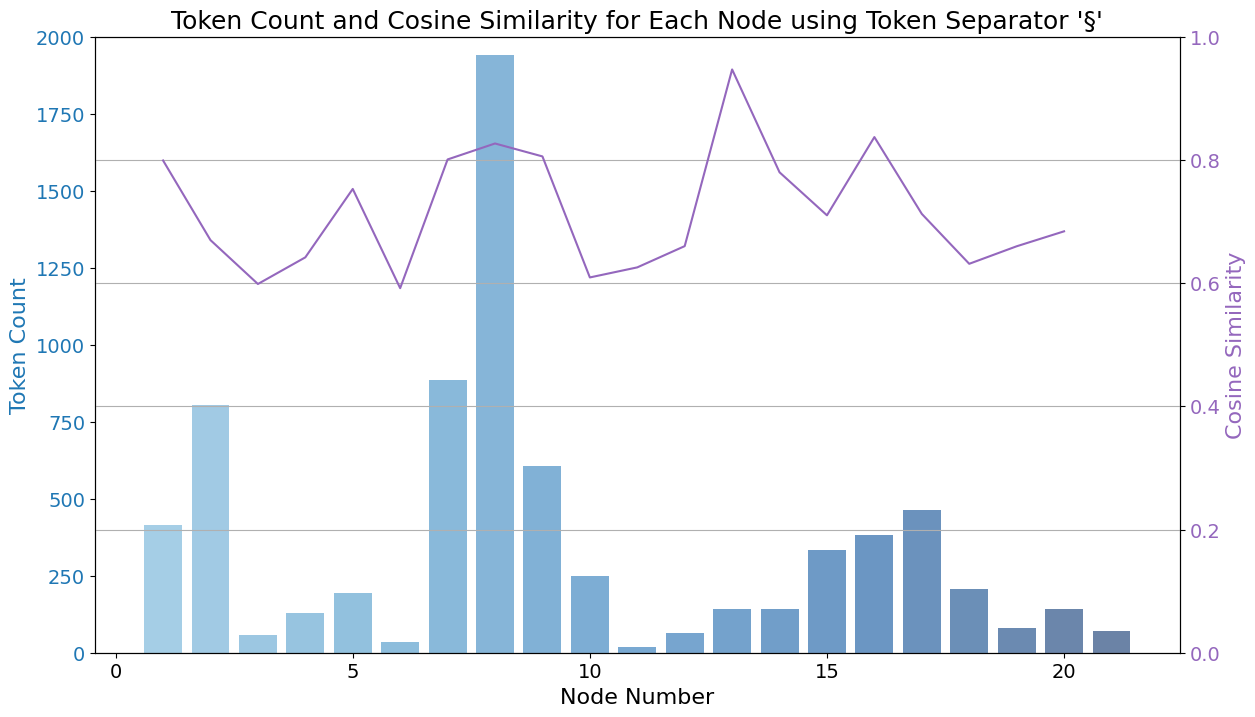

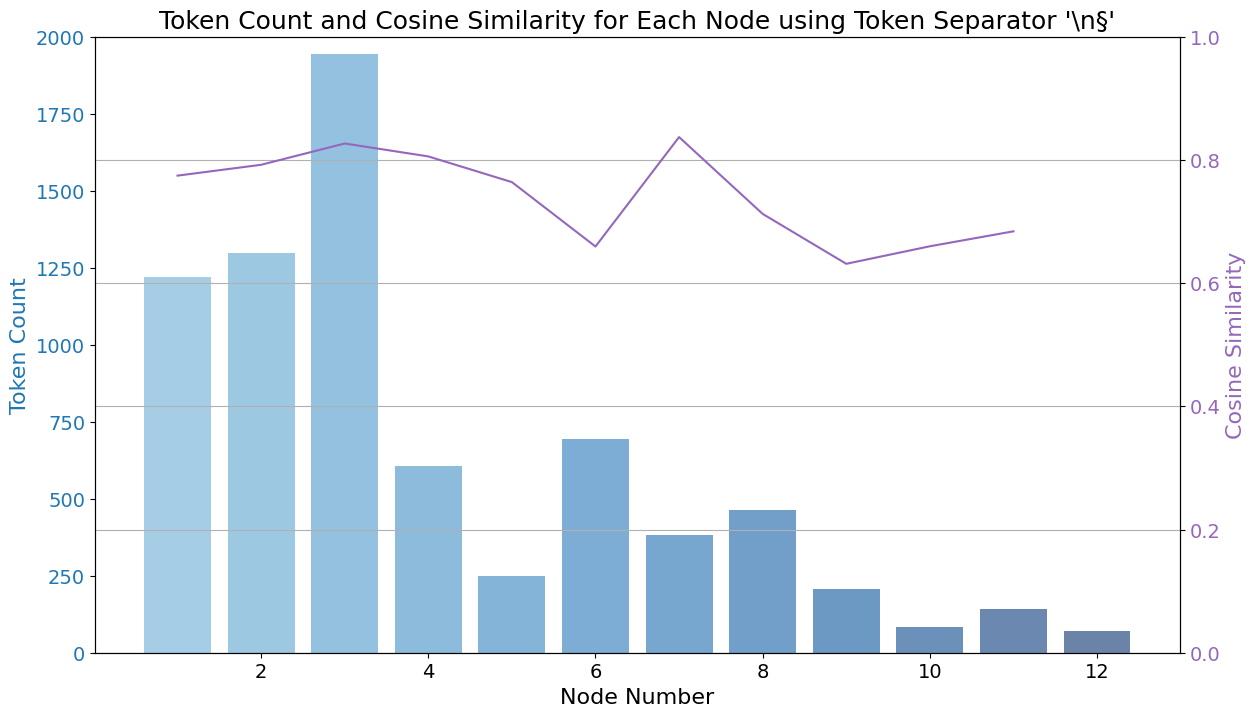

Metrics for token separator '§':
Mean token count: 350.57142857142856
Median token count: 195.0
Mean rolling cosine similarity: 0.7171785137416696
Median rolling cosine similarity: 0.6970898430374874

Metrics for token separator '\n§':
Mean token count: 613.5833333333334
Median token count: 424.0
Mean rolling cosine similarity: 0.7406464256983927
Median rolling cosine similarity: 0.7639710903167725


In [8]:
import re
import numpy as np
import matplotlib.pyplot as plt
from llama_index.core.schema import TextNode, NodeRelationship, RelatedNodeInfo
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

# Function to split text and create nodes
def create_nodes(all_text, token):
    pattern = re.compile(r"(?=" + re.escape(token) + ")")
    split_text = pattern.split(all_text)
    nodes = [TextNode(text=part, id_=f"node-{idx}") for idx, part in enumerate(split_text)]
    for idx in range(len(nodes) - 1):
        nodes[idx].relationships[NodeRelationship.NEXT] = RelatedNodeInfo(node_id=nodes[idx + 1].id_)
        nodes[idx + 1].relationships[NodeRelationship.PREVIOUS] = RelatedNodeInfo(node_id=nodes[idx].id_)
    return nodes

# Load the documents using PyMuPDFReader (assuming you have the loader and documents)
loader = PyMuPDFReader()
docs1 = loader.load(file_path="../legal_data/LL144/LL144.pdf")
docs2 = loader.load(file_path="../legal_data/LL144/LL144_Definitions.pdf")
docs = docs1 + docs2

# Initialize an empty string to store all text
all_text = "".join([doc.text for doc in docs])

# Initialize tokenizer and embedding model
tokenizer = tiktoken.get_encoding("cl100k_base")
embedding_model = SentenceTransformer("BAAI/bge-large-en-v1.5")

# Create nodes for both separators
nodes1 = create_nodes(all_text, "§")
nodes2 = create_nodes(all_text, "\n§")

# Function to get token counts and embeddings
def get_token_counts_and_embeddings(nodes):
    token_counts = [len(tokenizer.encode(node.text)) for node in nodes]
    embeddings = embedding_model.encode([node.text for node in nodes], convert_to_tensor=True)
    return token_counts, embeddings

# Function to calculate rolling cosine similarities
def get_rolling_cosine_similarities(embeddings):
    cosine_similarities = []
    for i in range(len(embeddings) - 1):
        cosine_sim = 1 - cosine(embeddings[i].cpu().numpy(), embeddings[i + 1].cpu().numpy())
        cosine_similarities.append(cosine_sim)
    return cosine_similarities

# Get token counts and embeddings for both sets of nodes
token_counts1, embeddings1 = get_token_counts_and_embeddings(nodes1)
token_counts2, embeddings2 = get_token_counts_and_embeddings(nodes2)

# Calculate rolling cosine similarities for both sets of nodes
cosine_similarities1 = get_rolling_cosine_similarities(embeddings1)
cosine_similarities2 = get_rolling_cosine_similarities(embeddings2)

# Function to plot token counts and cosine similarities
def plot_data(token_counts, cosine_similarities, token_separator, title):
    node_numbers = list(range(1, len(token_counts) + 1))
    rolling_node_numbers = list(range(1, len(cosine_similarities) + 1))
    
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    color = 'tab:blue'
    ax1.set_xlabel('Node Number', fontsize=16)
    ax1.set_ylabel('Token Count', color=color, fontsize=16)
    ax1.bar(node_numbers, token_counts, color=plt.cm.Blues(np.linspace(0.5, 1, len(node_numbers))), alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.set_ylim(0, 2000)
    
    ax2 = ax1.twinx()
    color = 'tab:purple'
    ax2.set_ylabel('Cosine Similarity', color=color, fontsize=16)
    ax2.plot(rolling_node_numbers, cosine_similarities, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax2.set_ylim(0, 1)
    
    plt.title(title, fontsize=18)
    plt.grid()
    plt.show()

# Plot data for both token separators
plot_data(token_counts1, cosine_similarities1, "§", "Token Count and Cosine Similarity for Each Node using Token Separator '§'")
plot_data(token_counts2, cosine_similarities2, "\n§", "Token Count and Cosine Similarity for Each Node using Token Separator '\\n§'")

# Compute mean and median for token counts and rolling cosine similarities
def compute_mean_median(token_counts, cosine_similarities):
    mean_token_count = np.mean(token_counts)
    median_token_count = np.median(token_counts)
    mean_cosine_similarity = np.mean(cosine_similarities)
    median_cosine_similarity = np.median(cosine_similarities)
    return mean_token_count, median_token_count, mean_cosine_similarity, median_cosine_similarity

# Compute metrics for both sets of nodes
metrics1 = compute_mean_median(token_counts1, cosine_similarities1)
metrics2 = compute_mean_median(token_counts2, cosine_similarities2)

# Print results
print(f"Metrics for token separator '§':")
print(f"Mean token count: {metrics1[0]}")
print(f"Median token count: {metrics1[1]}")
print(f"Mean rolling cosine similarity: {metrics1[2]}")
print(f"Median rolling cosine similarity: {metrics1[3]}")

print(f"\nMetrics for token separator '\\n§':")
print(f"Mean token count: {metrics2[0]}")
print(f"Median token count: {metrics2[1]}")
print(f"Mean rolling cosine similarity: {metrics2[2]}")
print(f"Median rolling cosine similarity: {metrics2[3]}")


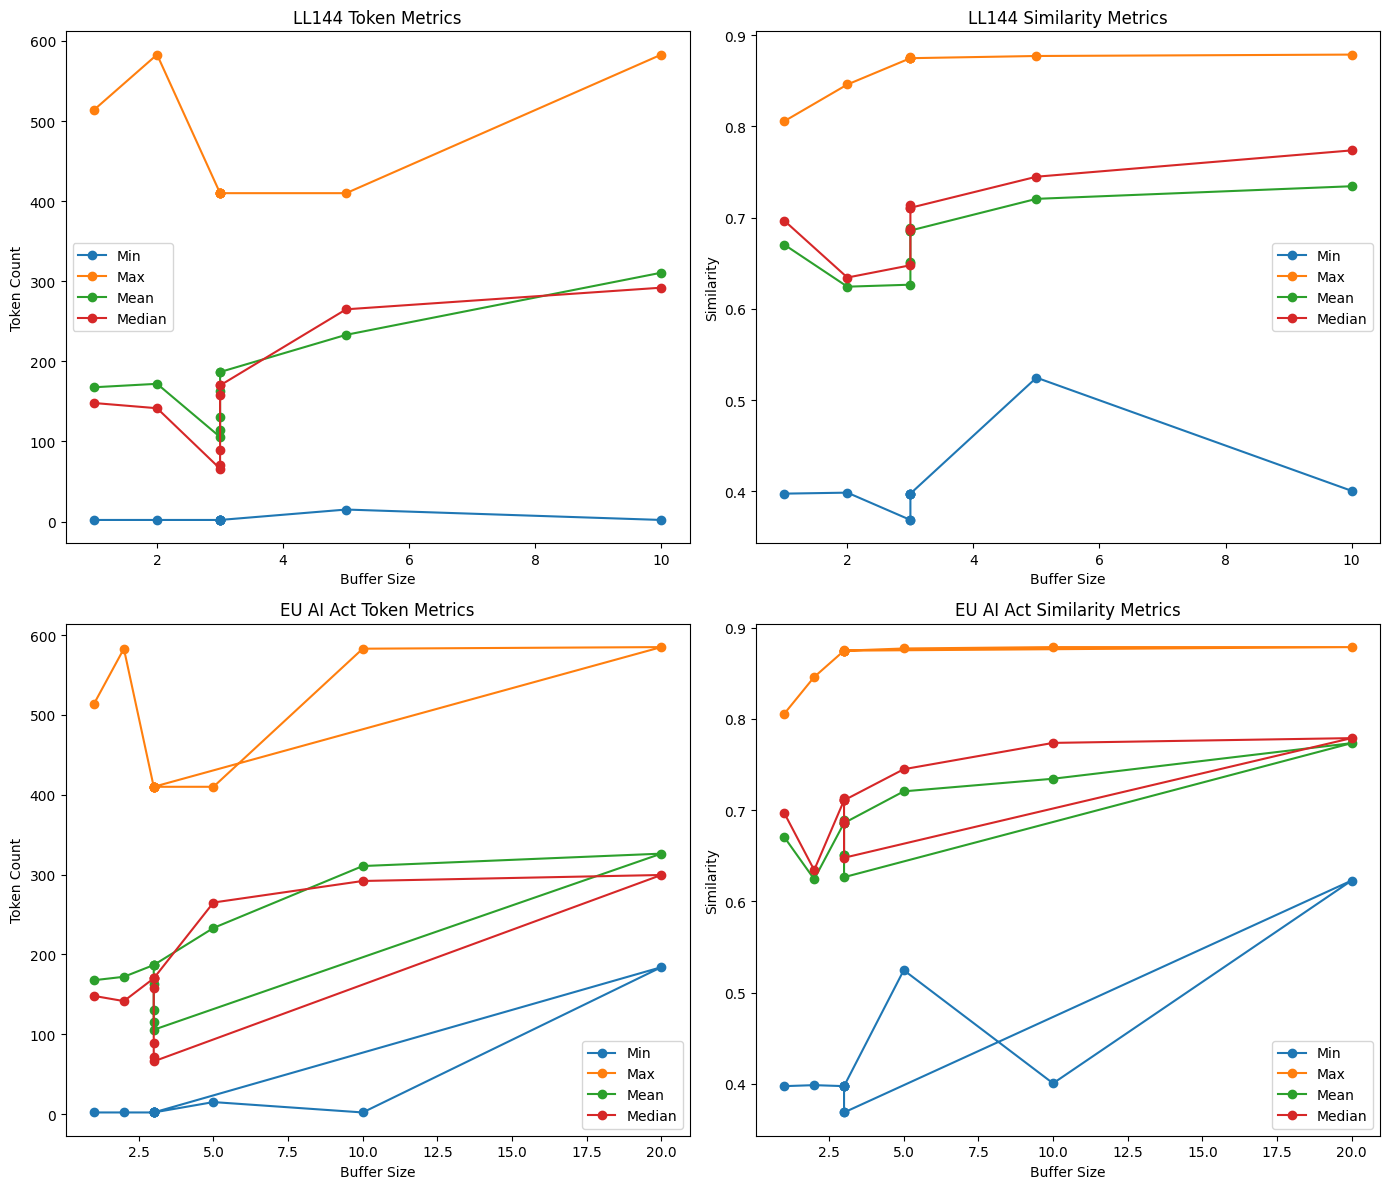

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for LL144 Token Metrics
ll144_token_metrics = {
    'Buffer Size': [1, 2, 3, 3, 3, 3, 3, 3, 5, 10],
    'Threshold': [90, 90, 50, 60, 70, 80, 90, 95, 90, 90],
    'Min': [2, 2, 2, 2, 2, 2, 2, 2, 15, 2],
    'Max': [514, 583, 410, 410, 410, 410, 410, 410, 410, 583],
    'Mean': [167.67, 171.97, 105.60, 114.84, 130.84, 163.40, 186.69, 186.69, 233.14, 310.71],
    'Median': [148.0, 141.5, 66.0, 71.0, 89.5, 158.0, 170.0, 170.0, 265.0, 292.0]
}

# Data for LL144 Similarity Metrics
ll144_similarity_metrics = {
    'Buffer Size': [1, 2, 3, 3, 3, 3, 3, 3, 5, 10],
    'Threshold': [90, 90, 50, 60, 70, 80, 90, 95, 90, 90],
    'Min': [0.397524, 0.398611, 0.368685, 0.368685, 0.397524, 0.397524, 0.397524, 0.397524, 0.524627, 0.400599],
    'Max': [0.805701, 0.845901, 0.874735, 0.874735, 0.874735, 0.875940, 0.874735, 0.874735, 0.877138, 0.878663],
    'Mean': [0.670355, 0.624334, 0.626512, 0.650602, 0.650962, 0.688729, 0.685856, 0.685856, 0.720584, 0.734403],
    'Median': [0.696661, 0.634343, 0.647795, 0.687821, 0.686430, 0.713489, 0.710785, 0.710785, 0.744840, 0.773679]
}

# Data for EU AI Act Token Metrics
eu_token_metrics = {
    'Buffer Size': [1, 2, 3, 5, 10, 20, 3, 3, 3, 3, 3, 3],
    'Threshold': [90, 90, 90, 90, 90, 90, 50, 60, 70, 80, 90, 95],
    'Min': [2, 2, 2, 15, 2, 184, 2, 2, 2, 2, 2, 2],
    'Max': [514, 583, 410, 410, 583, 585, 410, 410, 410, 410, 410, 410],
    'Mean': [167.67, 171.97, 186.69, 233.14, 310.71, 326.25, 105.60, 114.84, 130.84, 163.40, 186.69, 186.69],
    'Median': [148.0, 141.5, 170.0, 265.0, 292.0, 299.5, 66.0, 71.0, 89.5, 158.0, 170.0, 170.0]
}

# Data for EU AI Act Similarity Metrics
eu_similarity_metrics = {
    'Buffer Size': [1, 2, 3, 5, 10, 20, 3, 3, 3, 3, 3, 3],
    'Threshold': [90, 90, 90, 90, 90, 90, 50, 60, 70, 80, 90, 95],
    'Min': [0.397524, 0.398611, 0.397524, 0.524627, 0.400599, 0.622850, 0.368685, 0.368685, 0.397524, 0.397524, 0.397524, 0.397524],
    'Max': [0.805701, 0.845901, 0.874735, 0.877138, 0.878663, 0.878663, 0.874735, 0.874735, 0.874735, 0.875940, 0.874735, 0.874735],
    'Mean': [0.670355, 0.624334, 0.685856, 0.720584, 0.734403, 0.773410, 0.626512, 0.650602, 0.650962, 0.688729, 0.685856, 0.685856],
    'Median': [0.696661, 0.634343, 0.710785, 0.744840, 0.773679, 0.778915, 0.647795, 0.687821, 0.686430, 0.713489, 0.710785, 0.710785]
}

# Creating DataFrames
df_ll144_token = pd.DataFrame(ll144_token_metrics)
df_ll144_similarity = pd.DataFrame(ll144_similarity_metrics)
df_eu_token = pd.DataFrame(eu_token_metrics)
df_eu_similarity = pd.DataFrame(eu_similarity_metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# LL144 Token Metrics
axes[0, 0].plot(df_ll144_token['Buffer Size'], df_ll144_token['Min'], marker='o', label='Min')
axes[0, 0].plot(df_ll144_token['Buffer Size'], df_ll144_token['Max'], marker='o', label='Max')
axes[0, 0].plot(df_ll144_token['Buffer Size'], df_ll144_token['Mean'], marker='o', label='Mean')
axes[0, 0].plot(df_ll144_token['Buffer Size'], df_ll144_token['Median'], marker='o', label='Median')
axes[0, 0].set_title('LL144 Token Metrics')
axes[0, 0].set_xlabel('Buffer Size')
axes[0, 0].set_ylabel('Token Count')
axes[0, 0].legend()

# LL144 Similarity Metrics
axes[0, 1].plot(df_ll144_similarity['Buffer Size'], df_ll144_similarity['Min'], marker='o', label='Min')
axes[0, 1].plot(df_ll144_similarity['Buffer Size'], df_ll144_similarity['Max'], marker='o', label='Max')
axes[0, 1].plot(df_ll144_similarity['Buffer Size'], df_ll144_similarity['Mean'], marker='o', label='Mean')
axes[0, 1].plot(df_ll144_similarity['Buffer Size'], df_ll144_similarity['Median'], marker='o', label='Median')
axes[0, 1].set_title('LL144 Similarity Metrics')
axes[0, 1].set_xlabel('Buffer Size')
axes[0, 1].set_ylabel('Similarity')
axes[0, 1].legend()

# EU AI Act Token Metrics
axes[1, 0].plot(df_eu_token['Buffer Size'], df_eu_token['Min'], marker='o', label='Min')
axes[1, 0].plot(df_eu_token['Buffer Size'], df_eu_token['Max'], marker='o', label='Max')
axes[1, 0].plot(df_eu_token['Buffer Size'], df_eu_token['Mean'], marker='o', label='Mean')
axes[1, 0].plot(df_eu_token['Buffer Size'], df_eu_token['Median'], marker='o', label='Median')
axes[1, 0].set_title('EU AI Act Token Metrics')
axes[1, 0].set_xlabel('Buffer Size')
axes[1, 0].set_ylabel('Token Count')
axes[1, 0].legend()

# EU AI Act Similarity Metrics
axes[1, 1].plot(df_eu_similarity['Buffer Size'], df_eu_similarity['Min'], marker='o', label='Min')
axes[1, 1].plot(df_eu_similarity['Buffer Size'], df_eu_similarity['Max'], marker='o', label='Max')
axes[1, 1].plot(df_eu_similarity['Buffer Size'], df_eu_similarity['Mean'], marker='o', label='Mean')
axes[1, 1].plot(df_eu_similarity['Buffer Size'], df_eu_similarity['Median'], marker='o', label='Median')
axes[1, 1].set_title('EU AI Act Similarity Metrics')
axes[1, 1].set_xlabel('Buffer Size')
axes[1, 1].set_ylabel('Similarity')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [14]:
buffer_size_ll144 = [1, 2, 3, 5, 10, 3, 3, 3, 3, 3]
threshold_ll144 = [90, 90, 50, 90, 90, 60, 70, 80, 90, 95]
min_tokens_ll144 = [2, 2, 2, 15, 2, 2, 2, 2, 2, 2]
max_tokens_ll144 = [514, 583, 410, 410, 583, 410, 410, 410, 410, 410]
mean_tokens_ll144 = [167.67, 171.97, 105.60, 233.14, 310.71, 114.84, 130.84, 163.40, 186.69, 186.69]
median_tokens_ll144 = [148.0, 141.5, 66.0, 265.0, 292.0, 71.0, 89.5, 158.0, 170.0, 170.0]
min_similarity_ll144 = [0.3975, 0.3986, 0.3687, 0.5246, 0.4006, 0.3687, 0.3975, 0.3975, 0.3975, 0.3975]
max_similarity_ll144 = [0.8057, 0.8459, 0.8747, 0.8771, 0.8787, 0.8747, 0.8747, 0.8759, 0.8747, 0.8747]
mean_similarity_ll144 = [0.6704, 0.6243, 0.6265, 0.7206, 0.7344, 0.6506, 0.6510, 0.6887, 0.6859, 0.6859]
median_similarity_ll144 = [0.6478, 0.7448, 0.7737, 0.6878, 0.6864, 0.7135]


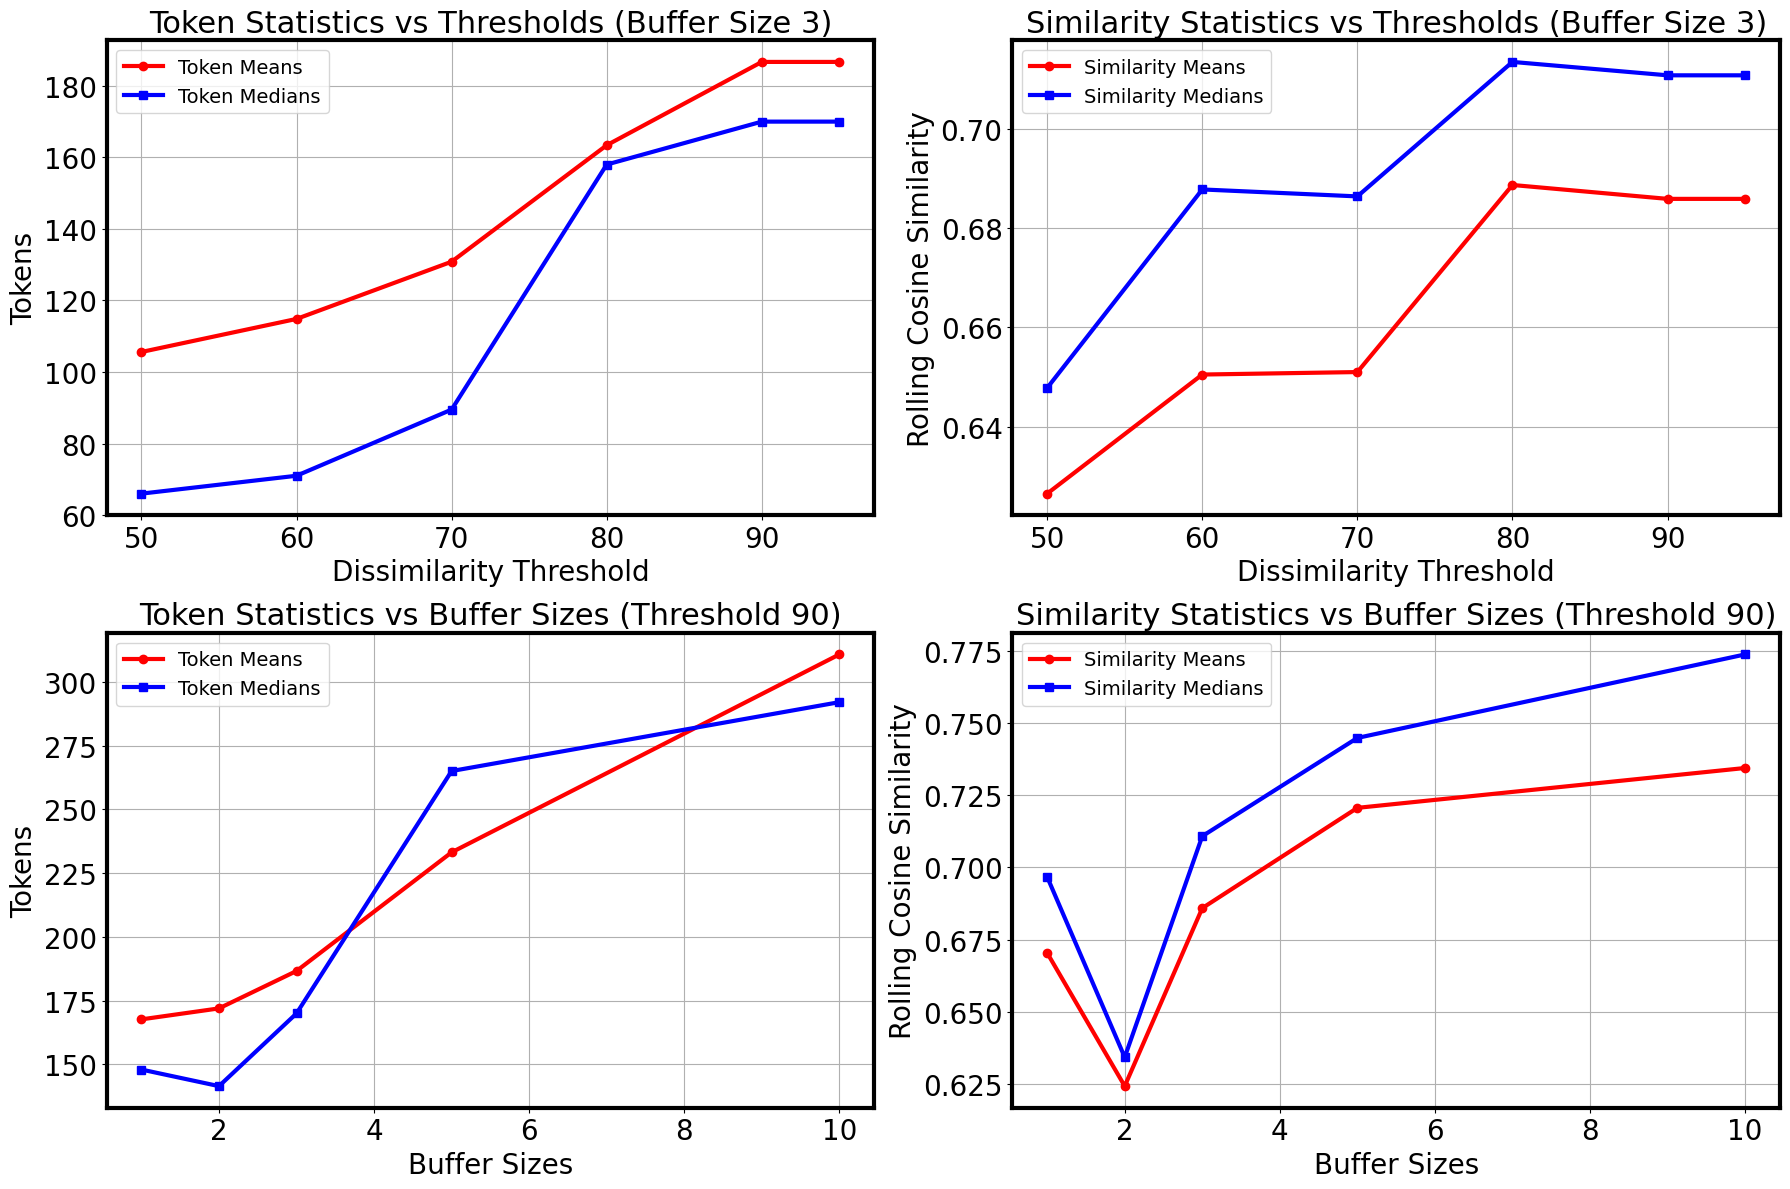

In [20]:
#vary threshold buffer size fixed - LL144
thresholds_ll144 = [50,60,70,80,90,95]
token_means_1 = [105.60, 114.84, 130.84, 163.40, 186.69, 186.69]
token_medians_1 = [66, 71, 89.5, 158.0, 170.0, 170.0]
similarity_means_1 = [0.6265,0.6505, 0.6510, 0.6887, 0.6859, 0.6859]
similarity_medians_1 = [0.6478, 0.6878, 0.6864, 0.7135, 0.7108, 0.7108]



# buffer size vary , threshold fixed at 90
buffers_ll144 = [1,2,3,5,10]
token_means_2 = [167.67, 171.97, 186.63, 233.14, 310.71]
token_medians_2 = [148.0, 141.5, 170.0, 265.0, 292.0]
similarity_means_2 = [0.6704, 0.6243, 0.6859, 0.7206, 0.7344]
similarity_medians_2 = [0.6967, 0.6343, 0.7108, 0.7448, 0.7737]

# Function to apply general plot settings with consistent colors and larger fonts and updated axis labels
def apply_plot_settings_v6(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=22)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.legend(fontsize=14)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

# Create 2x2 grid for all plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Token Means and Medians vs Thresholds
axs[0, 0].plot(thresholds_ll144, token_means_1, label='Token Means', marker='o', color='red', linewidth=3)
axs[0, 0].plot(thresholds_ll144, token_medians_1, label='Token Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[0, 0], 'Token Statistics vs Thresholds (Buffer Size 3)', 'Dissimilarity Threshold', 'Tokens')

# Plot 2: Similarity Means and Medians vs Thresholds
axs[0, 1].plot(thresholds_ll144, similarity_means_1, label='Similarity Means', marker='o', color='red', linewidth=3)
axs[0, 1].plot(thresholds_ll144, similarity_medians_1, label='Similarity Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[0, 1], 'Similarity Statistics vs Thresholds (Buffer Size 3)', 'Dissimilarity Threshold', 'Rolling Cosine Similarity')

# Plot 3: Token Means and Medians vs Buffer Sizes
axs[1, 0].plot(buffers_ll144, token_means_2, label='Token Means', marker='o', color='red', linewidth=3)
axs[1, 0].plot(buffers_ll144, token_medians_2, label='Token Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[1, 0], 'Token Statistics vs Buffer Sizes (Threshold 90)', 'Buffer Sizes', 'Tokens')

# Plot 4: Similarity Means and Medians vs Buffer Sizes
axs[1, 1].plot(buffers_ll144, similarity_means_2, label='Similarity Means', marker='o', color='red', linewidth=3)
axs[1, 1].plot(buffers_ll144, similarity_medians_2, label='Similarity Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[1, 1], 'Similarity Statistics vs Buffer Sizes (Threshold 90)', 'Buffer Sizes', 'Rolling Cosine Similarity')

plt.tight_layout()
plt.show()


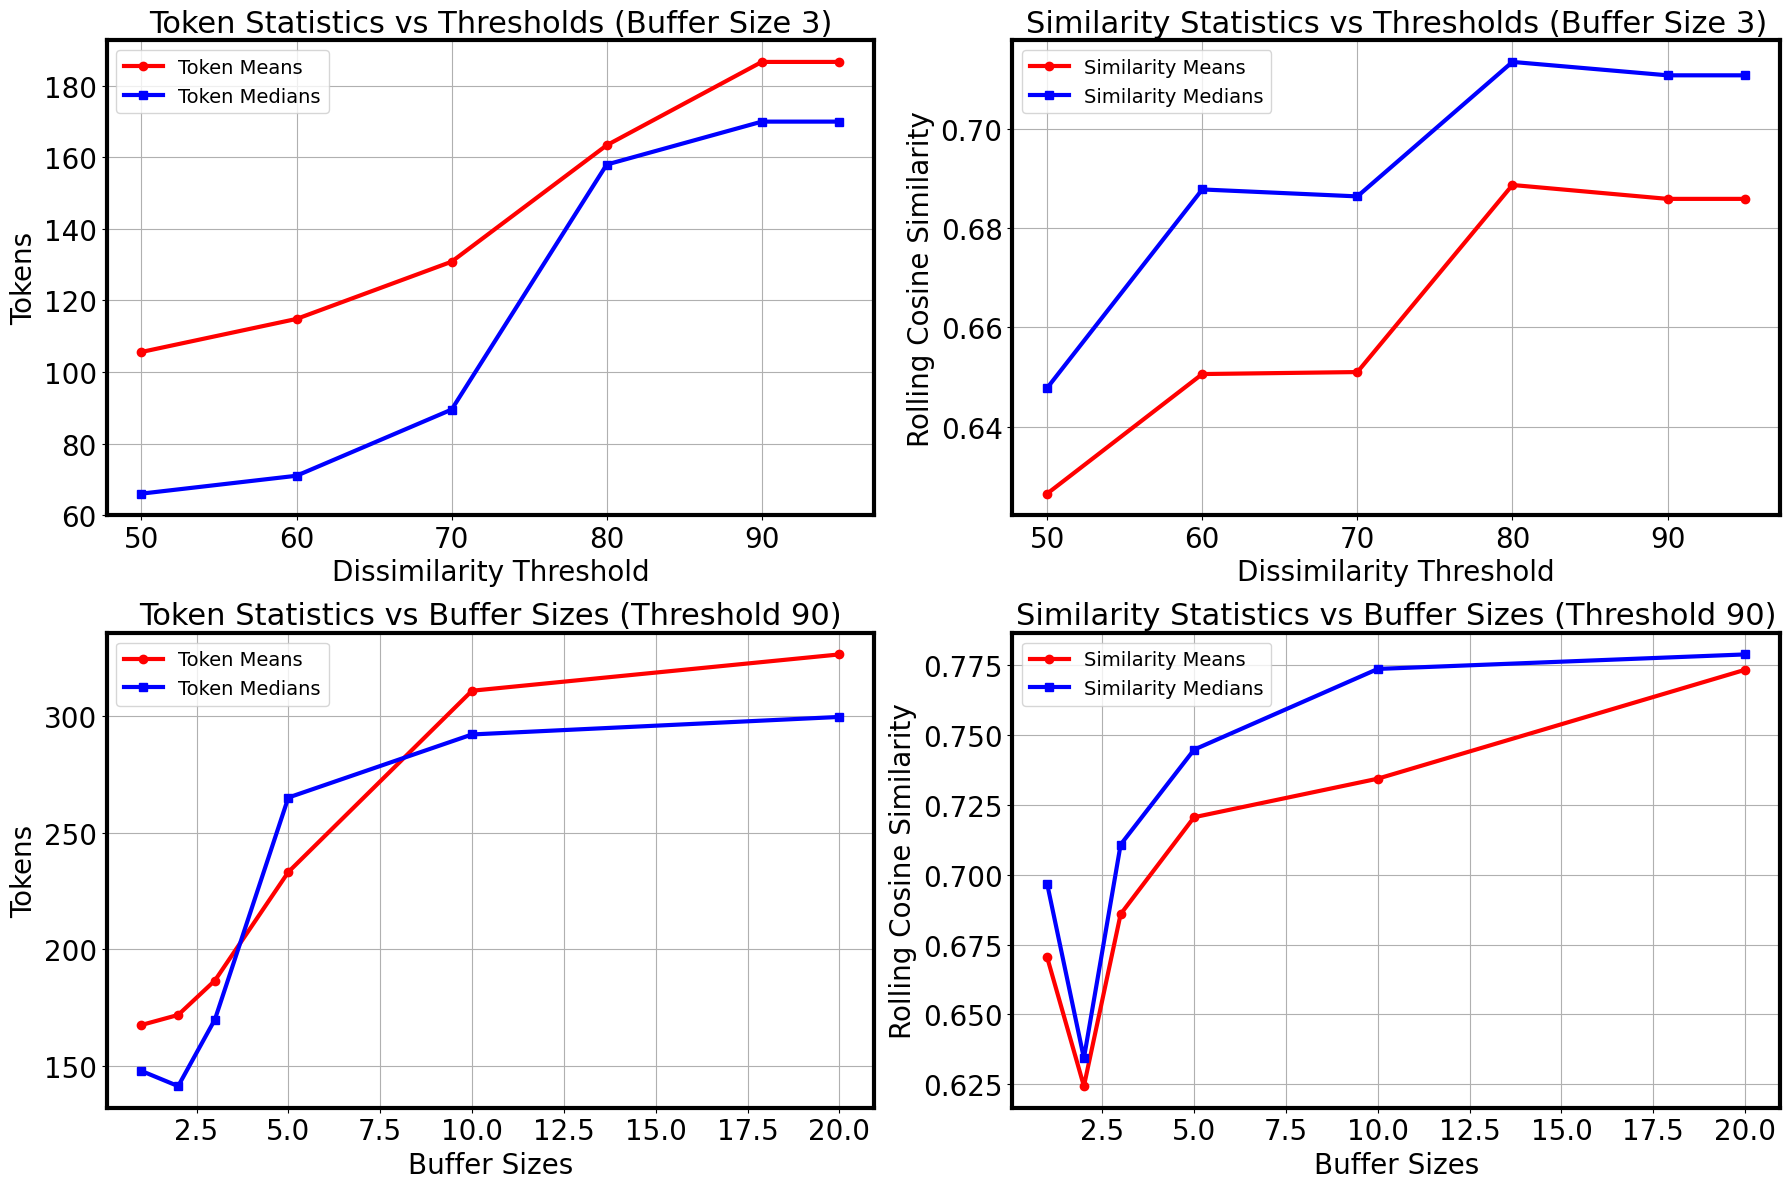

: 

In [21]:
# Data for EU AI Act
thresholds_eu = [50, 60, 70, 80, 90, 95]
token_means_eu1 = [105.60, 114.84, 130.84, 163.40, 186.69, 186.69]
token_medians_eu1 = [66.0, 71.0, 89.5, 158.0, 170.0, 170.0]
similarity_means_eu1 = [0.6265, 0.6506, 0.6510, 0.6887, 0.6859, 0.6859]
similarity_medians_eu1 = [0.6478, 0.6878, 0.6864, 0.7135, 0.7108, 0.7108]

buffers_eu = [1, 2, 3, 5, 10, 20]
token_means_eu2 = [167.67, 171.97, 186.69, 233.14, 310.71, 326.25]
token_medians_eu2 = [148.0, 141.5, 170.0, 265.0, 292.0, 299.5]
similarity_means_eu2 = [0.6704, 0.6243, 0.6859, 0.7206, 0.7344, 0.7734]
similarity_medians_eu2 = [0.6967, 0.6343, 0.7108, 0.7448, 0.7737, 0.7789]

# Create 2x2 grid for all plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Token Means and Medians vs Thresholds for EU AI Act
axs[0, 0].plot(thresholds_eu, token_means_eu1, label='Token Means', marker='o', color='red', linewidth=3)
axs[0, 0].plot(thresholds_eu, token_medians_eu1, label='Token Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[0, 0], 'Token Statistics vs Thresholds (Buffer Size 3)', 'Dissimilarity Threshold', 'Tokens')

# Plot 2: Similarity Means and Medians vs Thresholds for EU AI Act
axs[0, 1].plot(thresholds_eu, similarity_means_eu1, label='Similarity Means', marker='o', color='red', linewidth=3)
axs[0, 1].plot(thresholds_eu, similarity_medians_eu1, label='Similarity Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[0, 1], 'Similarity Statistics vs Thresholds (Buffer Size 3)', 'Dissimilarity Threshold', 'Rolling Cosine Similarity')

# Plot 3: Token Means and Medians vs Buffer Sizes for EU AI Act
axs[1, 0].plot(buffers_eu, token_means_eu2, label='Token Means', marker='o', color='red', linewidth=3)
axs[1, 0].plot(buffers_eu, token_medians_eu2, label='Token Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[1, 0], 'Token Statistics vs Buffer Sizes (Threshold 90)', 'Buffer Sizes', 'Tokens')

# Plot 4: Similarity Means and Medians vs Buffer Sizes for EU AI Act
axs[1, 1].plot(buffers_eu, similarity_means_eu2, label='Similarity Means', marker='o', color='red', linewidth=3)
axs[1, 1].plot(buffers_eu, similarity_medians_eu2, label='Similarity Medians', marker='s', color='blue', linewidth=3)
apply_plot_settings_v6(axs[1, 1], 'Similarity Statistics vs Buffer Sizes (Threshold 90)', 'Buffer Sizes', 'Rolling Cosine Similarity')

plt.tight_layout()
plt.show()
